In [1]:
import tensorflow
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Knapsack

In [51]:
knapsack_frame = pd.read_csv('knapsack.csv')
#knapsack_frame = knapsack_frame.reindex(np.random.permutation(knapsack_frame.index))
knapsack_labels = knapsack_frame['Label'].to_numpy()
knapsack_features = knapsack_frame.loc[:, 'DominantPairs':'ReducedGreedyUnusedCapacity'].to_numpy()
print(knapsack_labels)

[0 0 0 ... 1 1 1]


In [52]:
scaler = MinMaxScaler()
scaler.fit(knapsack_features)
knapsack_features = scaler.transform(knapsack_features) 
print(knapsack_features)

[[5.28050306e-01 6.90360212e-01 2.48941143e-04 ... 0.00000000e+00
  0.00000000e+00 9.86728051e-03]
 [5.52841209e-01 7.06471002e-01 2.50441662e-03 ... 0.00000000e+00
  0.00000000e+00 4.63491993e-03]
 [5.40539468e-01 7.01738879e-01 1.24107567e-04 ... 0.00000000e+00
  0.00000000e+00 9.86728051e-03]
 ...
 [8.84452296e-02 2.94998467e-01 8.65005553e-01 ... 1.00000000e+00
  0.00000000e+00 1.27462400e-03]
 [3.24698616e-01 4.40323644e-01 8.69997380e-01 ... 8.14485691e-01
  1.42306103e-01 7.68715613e-01]
 [5.42971190e-02 4.69824693e-01 8.75000411e-01 ... 9.65654928e-01
  4.68459711e-01 3.00566626e-01]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = knapsack_features
y = knapsack_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1,stratify=y)

clf= RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print('Precision: %.3f' % precision)
print('Precision: %.3f' % recall)

Accuracy: 0.9381818181818182
Precision: 0.940
Precision: 0.938


# run RF with kfold splits

In [53]:
X = knapsack_features
y = knapsack_labels

cv = KFold(n_splits=10, random_state=2, shuffle=True)
all_tests = []
all_predictions = []

mixer = list(zip(knapsack_features, knapsack_labels))
random.shuffle(mixer)
X, y = zip(*mixer)
X = np.array(X)
y = np.array(y)
f1s = []
accs = []
for train_index, test_index in cv.split(X, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf= RandomForestClassifier(n_estimators=100)

  # Supervised training of the model
    print("Start training")
    clf.fit(X_train, y_train)
    print("Prendictions on unseen data")
    predicted_y = clf.predict(X_test)
    f1s.append(f1_score(y_test,predicted_y, average = None))
    accs.append(accuracy_score(y_test,predicted_y))
    all_tests.append(y_test)
    all_predictions.append(predicted_y)

Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data


In [56]:
print(np.std(accs))

0.008901685233707116


In [55]:
print(sum(accs)/10)

0.9346000000000002


In [21]:

predictions = []
for sublist in all_predictions:
    for item in sublist:
        predictions.append(int(item))

tests = []
for sublist in all_tests:
    for item in sublist:
        tests.append(item)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(tests,predictions)
print(report)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import f1_score

print("Accuracy:",metrics.accuracy_score(tests, predictions))
precision = precision_score(tests, predictions)
recall = recall_score(tests, predictions)
f1_score = f1_score(tests, predictions)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-score: %.3f' % f1_score)

Accuracy: 0.9279188948306596
Precision: 0.919
Recall: 0.855
F1-score: 0.886


# TSPMETA

In [ ]:
tsp_frame = pd.read_csv('metadata/SterlingFeatures/tspmeta.csv')

tsp_frame2 = tsp_frame.drop(tsp_frame[tsp_frame.Labels == 2].index)
tsp_labels = tsp_frame2['Labels'].to_numpy()
tsp_features = tsp_frame2.loc[:, 'angle_min':'nnds_coef_of_var'].to_numpy()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(tsp_features)
tsp_features = scaler.transform(tsp_features) 
print(tsp_features.shape)

(1686, 64)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
X = tsp_features
y = tsp_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

clf= RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-score: %.3f' % f1_score)
confusion_matrix(y_test, y_pred)

Accuracy: 0.8675889328063241
Precision: 0.641
Recall: 0.634
F1-score: 0.638


array([[380,  33],
       [ 34,  59]], dtype=int64)

# TSP Pihera

In [ ]:
tsp_frame = pd.read_csv('metadata/SterlingFeatures/pihera.csv')
tsp_frame2 = tsp_frame.drop(tsp_frame[tsp_frame.Labels == 2].index)
tsp_labels = tsp_frame2['Labels'].to_numpy()
tsp_features = tsp_frame2.loc[:, 'nn3-mindeg':'hulldist-skew'].to_numpy() 

In [ ]:
scaler = MinMaxScaler()
scaler.fit(tsp_features)
tsp_features = scaler.transform(tsp_features) 
print(tsp_features.shape)

(1686, 285)


In [ ]:
from sklearn.metrics import f1_score
X = tsp_features
y = tsp_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

clf= RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-score: %.3f' % f1_score)
confusion_matrix(y_test, y_pred)

Accuracy: 0.8774703557312253
Precision: 0.667
Recall: 0.667
F1-score: 0.667


array([[382,  31],
       [ 31,  62]], dtype=int64)

# TSPMETA + Pihera

In [ ]:
tsp_frame = pd.read_csv('metadata/SterlingFeatures/tspmetaPihera.csv')
tsp_frame2 = tsp_frame.drop(tsp_frame[tsp_frame.Labels == 2].index)
tsp_labels = tsp_frame2['Labels'].to_numpy()
tsp_features = tsp_frame2.loc[:, 'angle_min':'hulldist-skew'].to_numpy() 
print(tsp_features.shape)

(1686, 349)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(tsp_features)
tsp_features = scaler.transform(tsp_features) 
print(tsp_features)

[[1.17412036e-02 1.14987989e-01 6.01258956e-02 ... 4.52399745e-01
  6.79935138e-01 3.98559743e-01]
 [9.29128299e-03 2.34529399e-01 1.37557630e-01 ... 4.64865898e-01
  7.61225514e-01 4.23354362e-01]
 [7.96204002e-04 1.22075496e-01 7.48286440e-02 ... 4.77500362e-01
  8.09544983e-01 4.26797623e-01]
 ...
 [0.00000000e+00 3.77662609e-01 2.89390876e-01 ... 6.11690698e-01
  7.74529688e-01 3.54611189e-01]
 [0.00000000e+00 2.48458088e-01 2.41888530e-01 ... 6.58505963e-01
  7.52442196e-01 3.06303159e-01]
 [0.00000000e+00 1.54040239e-01 1.13800686e-01 ... 7.74449697e-01
  5.99355047e-01 1.61726564e-01]]


In [ ]:
from sklearn.metrics import f1_score

X = tsp_features
y = tsp_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

clf= RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-score: %.3f' % f1_score)
confusion_matrix(y_test, y_pred)

Accuracy: 0.8754940711462451
Precision: 0.656
Recall: 0.677
F1-score: 0.667


array([[380,  33],
       [ 30,  63]], dtype=int64)

# Reduced Features (2)

In [ ]:
tsp_frame = pd.read_csv('metadata/SterlingFeatures/reduced.csv')
tsp_frame2 = tsp_frame.drop(tsp_frame[tsp_frame.Labels == 2].index)
tsp_labels = tsp_frame2['Labels'].to_numpy()
tsp_features = tsp_frame2.loc[:, 'mst_dists_median':'nn5-sc-max-n'].to_numpy() 
print(tsp_features.shape)

(1686, 2)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(tsp_features)
tsp_features = scaler.transform(tsp_features) 
print(tsp_features)

[[0.62643929 0.01968665]
 [0.52852016 0.1122718 ]
 [0.55375008 0.01968665]
 ...
 [0.11364084 0.11355968]
 [0.18905705 0.37404352]
 [0.11434186 0.29064756]]


In [ ]:
from sklearn.metrics import f1_score
X = tsp_features
y = tsp_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

clf= RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
print(y_test.shape)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-score: %.3f' % f1_score)
confusion_matrix(y_test, y_pred)

(506,)
Accuracy: 0.8735177865612648
Precision: 0.671
Recall: 0.613
F1-score: 0.640


array([[385,  28],
       [ 36,  57]], dtype=int64)

# Graph Colouring

In [57]:
GC_frame = pd.read_csv('GC_features.csv')
GC_labels = GC_frame['label'].to_numpy()
GC_features = GC_frame.loc[:, 'density':'alge_conn'].to_numpy()
print(GC_features.shape)

(5000, 3)


In [58]:
scaler = MinMaxScaler()
scaler.fit(GC_features)
GC_features = scaler.transform(GC_features) 
print(GC_features)

[[0.66165966 0.14583326 0.13744327]
 [0.31515795 0.35701529 0.10826942]
 [0.2592961  0.14301654 0.03358814]
 ...
 [0.58514947 0.01551187 0.01975291]
 [0.2014039  0.05676654 0.01041185]
 [0.9990355  0.06109777 0.22474976]]


In [ ]:
from sklearn.metrics import f1_score

X = GC_features
y = GC_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

clf= RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-score: %.3f' % f1_score)
confusion_matrix(y_test, y_pred)

Accuracy: 0.6993333333333334
Precision: 0.720
Recall: 0.653
F1-score: 0.685


array([[559, 191],
       [260, 490]])

In [59]:
from sklearn.metrics import f1_score

X = GC_features
y = GC_labels
mixer = list(zip(GC_features, GC_labels))
random.shuffle(mixer)
X, y = zip(*mixer)

X = np.array(X)
y = np.array(y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
all_tests = []
all_predictions = []
macrof1s = []
accs = []
for train_index, test_index in cv.split(X, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf= RandomForestClassifier(n_estimators=100)

  # Supervised training of the model
    print("Start training")
    clf.fit(X_train, y_train)

    print("Prendictions on unseen data")
    predicted_y = clf.predict(X_test)
    avgf1s = f1_score(y_test ,predicted_y, average = 'macro')
    accs.append(accuracy_score(y_test,predicted_y))
    macrof1s.append(avgf1s)
    all_tests.append(y_test)
    all_predictions.append(predicted_y)
  #print(predicted_y)

Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data
Start training
Prendictions on unseen data


In [64]:
mf1std = np.std(macrof1s)
print(mf1std)

0.02210760947423959


In [63]:
print(sum(macrof1s)/10)

0.6983870715045953


In [ ]:
predictions = []
for sublist in all_predictions:
    for item in sublist:
        predictions.append(int(item))

tests = []
for sublist in all_tests:
    for item in sublist:
        tests.append(item)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(tests,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2500
           1       0.70      0.67      0.69      2500

    accuracy                           0.69      5000
   macro avg       0.69      0.69      0.69      5000
weighted avg       0.69      0.69      0.69      5000



In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import f1_score

print("Accuracy:",metrics.accuracy_score(tests, predictions))
precision = precision_score(tests, predictions)
recall = recall_score(tests, predictions)
f1 = f1_score(tests, predictions)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-score: %.3f' % f1s)

Accuracy: 0.6994
Precision: 0.713
Recall: 0.668
F1-score: 0.690


# TSP TSPMETA Generated set

In [37]:
tsp_frame = pd.read_csv('selectedset-TSP-features.csv')
tsp_labels = tsp_frame['Label'].to_numpy()
tsp_features = tsp_frame.loc[:, 'angle_min':'nnds_coef_of_var']
tsp_features = tsp_features.fillna(0)
tsp_features = tsp_features.to_numpy()

In [38]:
from sklearn.impute import SimpleImputer


In [40]:
CHR_frame = pd.read_csv('CHR_features.csv')
Greedy_frame = pd.read_csv('Greedy_features.csv')
tsp_features = pd.concat([CHR_frame, Greedy_frame], ignore_index=True, sort=False)
tsp_features = tsp_features.loc[:, 'angle_min':'nnds_coef_of_var']
tsp_features = tsp_features.to_numpy()
tsp_labels = [0] *2500 + [1]*2500

mixer = list(zip(tsp_features, tsp_labels))
random.shuffle(mixer)
tsp_features, tsp_labels = zip(*mixer)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(tsp_features)
tsp_features = imp.transform(tsp_features)

In [41]:
scaler = MinMaxScaler()
scaler.fit(tsp_features)
tsp_features = scaler.transform(tsp_features) 
print(tsp_features)

[[1.         0.5        0.77626657 ... 0.01812708 0.00862833 0.04834575]
 [0.         1.         0.70822542 ... 0.0134038  0.01741838 0.0665701 ]
 [0.         1.         0.74299038 ... 0.01972759 0.02737094 0.07100445]
 ...
 [1.         1.         0.85610843 ... 0.01562321 0.00784667 0.03405033]
 [0.         1.         0.60536184 ... 0.01505188 0.01018768 0.06396751]
 [0.13491903 0.86748548 0.98005643 ... 0.08502984 0.06500831 0.26751014]]


In [ ]:
X = tsp_features
y = np.array(tsp_labels)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
all_tests = []
all_predictions = []
f1s = []
accs = []
for train_index, test_index in cv.split(X, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf= RandomForestClassifier(n_estimators=100)#, max_depth=4, max_leaf_nodes=6)

  # Supervised training of the model
    #print("Start training")
    clf.fit(X_train, y_train)

    #print("Prendictions on unseen data")
    predicted_y = clf.predict(X_test)
    report = classification_report(y_test,predicted_y)
    f1s.append(f1_score(y_test ,predicted_y, average = 'macro'))
    accs.append(accuracy_score(y_test ,predicted_y))
    #print(report)
    all_tests.append(y_test)
    all_predictions.append(predicted_y)

predictions = []
for sublist in all_predictions:
    for item in sublist:
        predictions.append(int(item))

tests = []
for sublist in all_tests:
    for item in sublist:
        tests.append(item)
report = classification_report(tests,predictions)
print(report)

In [50]:
print(sum(f1s)/10)
print(sum(accs)/10)
print(np.std(f1s))

0.9939893757273198
0.994
0.0035850571479392776


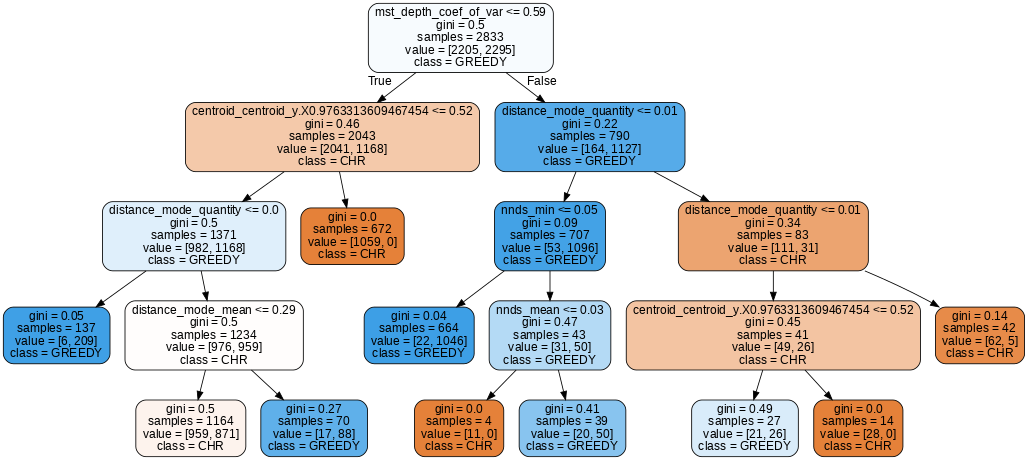

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file

estimator = clf.estimators_[0]
features_names = list(CHR_frame.loc[:, 'angle_min':'nnds_coef_of_var'].columns.values)
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features_names,
                class_names = ["CHR","GREEDY"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=60'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score

X = tsp_features
y = tsp_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

clf= RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-score: %.3f' % f1_score)
confusion_matrix(y_test, y_pred)

Accuracy: 0.7946666666666666
Precision: 0.844
Recall: 0.723
F1-score: 0.779


array([[650, 100],
       [208, 542]])

In [ ]:
X = tsp_features
y = np.array(tsp_labels)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
all_tests = []
all_predictions = []

for train_index, test_index in cv.split(X, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf= RandomForestClassifier(n_estimators=1)

  # Supervised training of the model
    print("Start training")
    clf.fit(X_train, y_train)

    print("Prendictions on unseen data")
    predicted_y = clf.predict(X_test)
    report = classification_report(y_test,predicted_y)
    print(report)
    all_tests.append(y_test)
    all_predictions.append(predicted_y)
  #print(predicted_y)

In [ ]:
predictions = []
for sublist in all_predictions:
    for item in sublist:
        predictions.append(int(item))

tests = []
for sublist in all_tests:
    for item in sublist:
        tests.append(item)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(tests,predictions)
print(report)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import f1_score

print("Accuracy:",metrics.accuracy_score(tests, predictions))
precision = precision_score(tests, predictions)
recall = recall_score(tests, predictions)
f1_score = f1_score(tests, predictions)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-score: %.3f' % f1_score)

Accuracy: 0.8058
Precision: 0.855
Recall: 0.736
F1-score: 0.791
